##**Experiment-4**

###**Aim: A* path planning algorithm using grid based planning**

THEORY :
The A* (A-star) algorithm is a widely used pathfinding algorithm in artificial intelligence and robotics. It's an extension of Dijkstra's algorithm with a heuristic to guide the search, making it more efficient in finding the shortest path from a start node to a goal node.

2. Components of A* Algorithm:
-->Cost Function (f): In A*, each node has a cost function, denoted as 'f'. It represents the total cost of reaching a node from the start node, plus the estimated cost of reaching the goal node from that node.
-->Heuristic Function (h): A* uses a heuristic function to estimate the cost of reaching the goal from any given node. This heuristic function is problem-specific and should be admissible (never overestimates the actual cost) and consistent (satisfies the triangle inequality).
-->Open List: The set of nodes to be evaluated, initially containing only the start node.
-->Closed List: The set of nodes already evaluated.

3. Algorithm Steps:
1.Initialize the start node: Set its cost 'f' to zero and add it to the open list.
2.While the open list is not empty:
-->Pop the node with the lowest 'f' value from the open list.
-->If the popped node is the goal node, the path has been found.
-->Otherwise, expand the node by considering all its neighbors.
3.For each neighboring node:
-->Calculate its cost 'f', considering both the cost to reach the neighbor from the current node ('g') and the heuristic cost to reach the goal from the neighbor ('h').
-->If the neighbor is not in the open list, add it.
-->If the neighbor is in the open list but with a higher cost, update its cost.
4.After considering all neighbors, mark the current node as visited and move it to the closed list.
Trace back the path: Once the goal node is reached, trace back the path from the goal node to the start node using the parent pointers stored during the search.

4. Properties:
1.A* is guaranteed to find the shortest path if:
2.The heuristic function is admissible.
3.The graph does not have cycles of negative cost.
3.A* is complete (always finds a solution if one exists) and optimal (finds the shortest path) in finite graphs with non-negative edge costs.

5. Heuristic Function:
-->Common heuristic functions include Manhattan distance, Euclidean distance, and Chebyshev distance, depending on the problem's domain and constraints.
6. Applications:
A* is widely used in robotics, video games, map routing, network routing, and various other fields where finding the shortest path is essential.

**Import necessory libraries**

In [1]:
import math
import heapq                     # The heapq module provides functions for heap queue algorithms.
import matplotlib.pyplot as plt  # Heap queue algorithm is a data structure where the smallest (or largest) element can be quickly accessed.

**Create class for grid cells**

In [2]:
# Define the Cell class
class Cell:                    # New class named Cell
    def __init__(self):        # The self parameter represents the instance of the class being initialized.
                               # This line defines the constructor method __init__() for the Cell class.
                               # The constructor is automatically called when a new instance of the class is created.
        self.parent_i = 0      # Parent cell's row index
        self.parent_j = 0      # Parent cell's column index
        self.f = float('inf')  # Total cost of the cell (g + h)
        self.g = float('inf')  # Cost from start to this cell
        self.h = 0             # Heuristic cost from this cell to destination

**Define the size of the grid**

In [3]:
ROW = 9
COL = 10

**Check if a cell is valid (within the grid)**

In [4]:
def is_valid(row, col):
    return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

**Check if a cell is unblocked**

In [5]:
def is_unblocked(grid, row, col):
    return grid[row][col] == 1

**Check if a cell is the destination**

In [6]:
def is_destination(row, col, dest):
    return row == dest[0] and col == dest[1]

**Calculate the heuristic value of a cell (Euclidean distance to destination)**

In [7]:
def calculate_h_value(row, col, dest):
    return ((row - dest[0]) ** 2 + (col - dest[1]) ** 2) ** 0.5

**Trace the path from source to destination**

In [8]:
# Trace the path from source to destination
def trace_path(cell_details, dest):
    print("The Path is ")
    path = []
    row = dest[0]
    col = dest[1]

    # Trace the path from destination to source using parent cells
    while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
        path.append((row, col))
        temp_row = cell_details[row][col].parent_i
        temp_col = cell_details[row][col].parent_j
        row = temp_row
        col = temp_col

# cell_details[row][col]: This accesses the cell details of the cell at position (row, col) in the cell_details array.
# parent_i: This accesses the parent_i attribute of the cell, which represents the row index of the parent cell.
# == row: This compares the parent_i attribute with the current row index row.

    # Add the source cell to the path
    path.append((row, col))
    # Reverse the path to get the path from source to destination
    path.reverse()

    # Print the path
    for i in path:
        print("->", i, end=" ")
    print()
    return path

**Implement the A* search algorithm**

In [9]:
def a_star_search(grid, src, dest):
    # Check if the source and destination are valid
    if not is_valid(src[0], src[1]) or not is_valid(dest[0], dest[1]):
        print("Source or destination is invalid")
        return

    # Check if the source and destination are unblocked
    if not is_unblocked(grid, src[0], src[1]) or not is_unblocked(grid, dest[0], dest[1]):
        print("Source or the destination is blocked")
        return

    # Check if we are already at the destination
    if is_destination(src[0], src[1], dest):
        print("We are already at the destination")
        return

    # Initialize the closed list (visited cells)
    closed_list = [[False for a in range(COL)] for a in range(ROW)]

#This line initializes a 2D list named closed_list.
#It represents the closed list in the A* search algorithm, which keeps track of visited cells.
#Each cell in the grid corresponds to a boolean value indicating whether it has been visited (True) or not (False).
#The list is initialized with dimensions ROW by COL, where each cell is initialized to False, indicating that no cell has been visited yet.




    # Initialize the details of each cell
    cell_details = [[Cell() for b in range(COL)] for b in range(ROW)]

#This line initializes a 2D list named cell_details.
#It represents the details of each cell in the grid.
#Each cell in the grid corresponds to a Cell object, which holds information such as the parent cell indices, total cost (f), cost from the start (g), and heuristic cost to the destination (h). The list is initialized with dimensions ROW by COL, where each cell is initialized with a new Cell object.
#This allows for easy access and modification of cell details during the A* search algorithm.

    # Initialize the start cell details
    i = src[0]
    j = src[1]
    cell_details[i][j].f = 0
    cell_details[i][j].g = 0
    cell_details[i][j].h = 0
    cell_details[i][j].parent_i = i
    cell_details[i][j].parent_j = j

    # Initialize the open list (cells to be visited) with the start cell
    open_list = []
    heapq.heappush(open_list, (0.0, i, j))

#The function adds the new element item to the heap heap.
#After the addition, the heap property is maintained.
#This means that the smallest element is always at index 0 of the heap list, and all other elements follow the heap property.


    # Initialize the flag for whether destination is found
    found_dest = False

    # Main loop of A* search algorithm
    while len(open_list) > 0:
        # Pop the cell with the smallest f value from the open list
        p = heapq.heappop(open_list)

#The function removes the smallest element from the heap heap.
#After the removal, the heap property is maintained.
#This means that the smallest element is always at index 0 of the heap list, and all other elements follow the heap property.


        # Mark the cell as visited
        i = p[1]
        j = p[2]
        closed_list[i][j] = True

        # For each direction, check the successors
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0), (1, 1), (1, -1), (-1, 1), (-1, -1)]
        for dir in directions:
            new_i = i + dir[0]
            new_j = j + dir[1]

            # If the successor is valid, unblocked, and not visited
            if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
                # If the successor is the destination
                if is_destination(new_i, new_j, dest):
                    # Set the parent of the destination cell
                    cell_details[new_i][new_j].parent_i = i
                    cell_details[new_i][new_j].parent_j = j
                    print("The destination cell is found")
                    # Trace and print the path from source to destination
                    path = trace_path(cell_details, dest)
                    found_dest = True
                    return path
                else:
                    # Calculate the new f, g, and h values
                    g_new = cell_details[i][j].g + 1.0
                    h_new = calculate_h_value(new_i, new_j, dest)
                    f_new = g_new + h_new

                    # If the cell is not in the open list or the new f value is smaller
                    if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
                        # Add the cell to the open list
                        heapq.heappush(open_list, (f_new, new_i, new_j))
                        # Update the cell details
                        cell_details[new_i][new_j].f = f_new
                        cell_details[new_i][new_j].g = g_new
                        cell_details[new_i][new_j].h = h_new
                        cell_details[new_i][new_j].parent_i = i
                        cell_details[new_i][new_j].parent_j = j

    # If the destination is not found after visiting all cells
    if not found_dest:
        print("Failed to find the destination cell")

In [10]:
closed_list = [[False for a in range(COL)] for a in range(ROW)]
closed_list

[[False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False],
 [False, False, False, False, False, False, False, False, False, False]]

In [11]:
cell_details = [[Cell() for a in range(COL)] for a in range(ROW)]
cell_details

[[<__main__.Cell at 0x17f4aa8e4d0>,

**Grid Visualization**

The destination cell is found
The Path is 
-> (6, 5) -> (5, 5) -> (4, 5) -> (3, 4) -> (2, 5) -> (1, 6) -> (2, 7) 


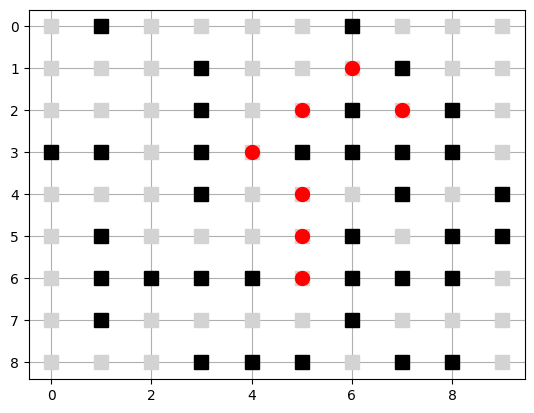

In [12]:
def visualize_grid(grid, path=None):
    fig, ax = plt.subplots()
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] == 1:
                ax.plot(j, i, marker='s', color='lightgray', markersize=10)   # unblocked cells
            else:
                ax.plot(j, i, marker='s', color='black', markersize=10)       # blocked cells
    if path:
        for node in path:
            ax.plot(node[1], node[0], marker='o', color='red', markersize=10) # A* Path
    plt.gca().invert_yaxis()  # Invert y axis to match grid coordinates
                              # This function retrieves the current Axes instance from the current figure.
                              #The "gca" stands for "get current axes".
    plt.grid(True)
    plt.show()

def main():
    # Define the grid (1 for unblocked, 0 for blocked)
    grid = [
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1],
        [0, 0, 1, 0, 1, 0, 0, 0, 0, 1],
        [1, 1, 1, 0, 1, 1, 1, 0, 1, 0],
        [1, 0, 1, 1, 1, 1, 0, 1, 0, 0],
        [1, 0, 0, 0, 0, 1, 0, 0, 0, 1],
        [1, 0, 1, 1, 1, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 0, 0, 1, 0, 0, 1]
    ]

    # Define the source and destination
    src = [6, 5]
    dest = [2, 7]

    # Run the A* search algorithm
    path = a_star_search(grid, src, dest)
    visualize_grid(grid, path)

if __name__ == "__main__":
    main()

CONCLUSION : In this code, we've completed the A* search algorithm and provided a simple main function to define the grid, source, and destination coordinates, call the A* search function, and visualize the grid with the computed path. You can run this code to see the A* algorithm in action for path planning on the defined grid.